# Simulating David's model in CPTL

https://ac.els-cdn.com/S187712971530157X/1-s2.0-S187712971530157X-main.pdf?_tid=b11f9cb1-6492-48b8-b4b9-de2973828ada&acdnat=1539901974_6ae757c3dcfc1c926101768b41b00243

Parameters as per David in CPTL, <b>modify</b> to play.  Choose <b>Kernel > Run All</b> to run simulations.

In [1]:
q = 100 # number of questions
x = 50 # total correct responses
p = 0.5 # probability of guessing correctly
k = 20 # number of questions known (= student knowledge)
beta = 0.1 # blunder rate

Import python libraries

In [2]:
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt

Define functions plain (<b>dubins0</b>), with student knowledge (<b>dubins1</b>), and with student knowledge and blunder (<b>dubins2</b>).

In [3]:
def dubins0(q,x,p): # no student knowledge
    return ss.comb(q,x) * np.power(p,x) * np.power(1-p,q-x)

def dubins1(q,x,p,k): # student knowledge of k questions
    return ss.comb(q-k,x-k) * np.power(p,x-k) * np.power(1-p,q-x)

def dubins2(q,x,p,k,beta): # student knowledge with blunder
    prob = []
    a = max(0,x-q+k)
    b = min(k,x)
#    print a,b # for debug
    for i in range(a,b+1):
        factor_1 = dubins0(k,i,1-beta)
#        factor_1 = 1 # for debug
        factor_2 = dubins0(q-k,x-i,p) 
        prob.append(factor_1 * factor_2)	
#        print ('factor_1, = %f; factor_2 = %f' % (factor_1,factor_2)) # for debug
    return sum(prob)

<b>dubins0</b>: Plain binomial distribution for getting total scores = x (Eqn 1)

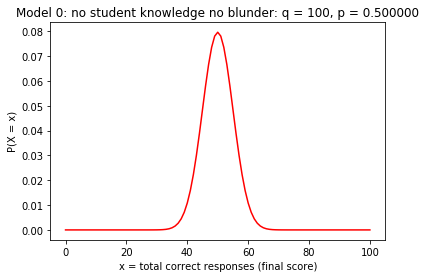

In [4]:
list = []
for i in range(q+1):
    list.append(dubins0(q,i,p))
plt.plot(list, 'r-')
plt.title('Model 0: no student knowledge no blunder: q = %i, p = %f' % (q, p))
plt.xlabel('x = total correct responses (final score)')
plt.ylabel('P(X = x)')
plt.show()

<b>dubins1</b>: Now with student knowledge (Eqn 2), but no blunder

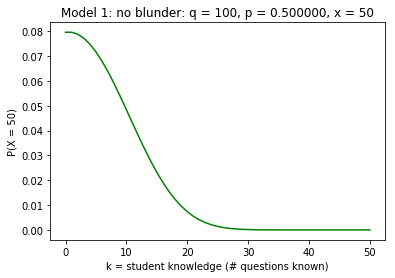

In [5]:
list2 = []
for i in range(x+1):
    list2.append(dubins1(q,x,p,i))
plt.plot(list2, 'g-')
plt.title('Model 1: no blunder: q = %i, p = %f, x = %i' % (q, p, x))
plt.xlabel('k = student knowledge (# questions known)')
plt.ylabel('P(X = %i)' %x)
plt.show()

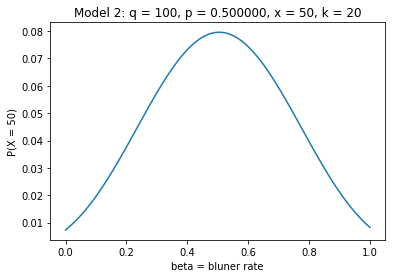

In [6]:
list3 = []
step = 0.01 # data density in data, feel free to change
i = 0
while i < 1:
    list3.append(dubins2(q,x,p,k,i))
    i += step

x_plot = np.linspace(0, 1, len(list3))
plt.plot(x_plot, list3)
plt.title('Model 2: q = %i, p = %f, x = %i, k = %i' % (q, p, x, k))
plt.xlabel('beta = bluner rate')
plt.ylabel('P(X = %i)' %x)
plt.show()